In [1]:
import pandas_datareader.data as reader
import datetime as dt
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
end=dt.datetime.now()
start=dt.date(end.year-5,end.month,end.day)
Input=['MSFT','^GSPC']

In [3]:
df=reader.get_data_yahoo(Input,start,end)['Adj Close']
df

Symbols,MSFT,^GSPC
Date,,
2017-07-26,69.359222,2477.830078
2017-07-27,68.525620,2475.419922
2017-07-28,68.413193,2472.100098
2017-07-31,68.094734,2470.300049
2017-08-01,67.982346,2476.350098
...,...,...
2022-07-21,264.839996,3998.949951
2022-07-22,260.359985,3961.629883
2022-07-25,258.829987,3966.840088


In [4]:
#monthly return
mlt_ret=df.resample('M').ffill().pct_change()
mlt_ret.dropna(axis=0,inplace=True)

In [5]:
mlt_ret=mlt_ret[:-2]

In [6]:
x=mlt_ret['^GSPC']
y=mlt_ret['MSFT']
x_sm=sm.add_constant(x)

In [7]:
model=sm.OLS(y,x_sm)

In [8]:
results=model.fit()

In [9]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MSFT   R-squared:                       0.604
Model:                            OLS   Adj. R-squared:                  0.597
Method:                 Least Squares   F-statistic:                     85.32
Date:                Wed, 27 Jul 2022   Prob (F-statistic):           7.48e-13
Time:                        21:30:31   Log-Likelihood:                 110.18
No. Observations:                  58   AIC:                            -216.4
Df Residuals:                      56   BIC:                            -212.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0164      0.005      3.308      0.002       0.006       0.026
^GSPC          0.9360      0.101      9.237      0.000       0.733       1.139
==============================================================================
Omnibus:                        3.835   Durbin-Watson:                   2.279
Prob(Omnibus):                  0.147   Jarque-Bera (JB):                3.473
Skew:                           0.598   Prob(JB):                        0.176
Kurtosis:                       2.932   Cond. No.                         20.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [10]:
import seaborn as sns

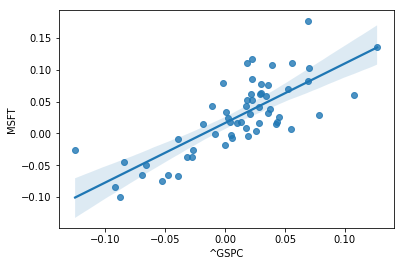

In [11]:
sns.regplot(x='^GSPC',y='MSFT',data=mlt_ret)#blue line is 95% confident interval
plt.show()

In [12]:
risk_freerate=reader.DataReader('F-F_Research_Data_Factors','famafrench',start,end)[0].RF
risk_freerate1=risk_freerate[1:]

In [13]:
risk_freerate1.head()

Date
2017-08    0.09
2017-09    0.09
2017-10    0.09
2017-11    0.08
2017-12    0.09
Freq: M, Name: RF, dtype: float64

In [14]:
mlt_ret['MSFT-rf'],mlt_ret['^GSPC-rf']=mlt_ret['MSFT']-risk_freerate1.values,mlt_ret['^GSPC']-risk_freerate1.values

In [15]:
mlt_ret.head()

Symbols,MSFT,^GSPC,MSFT-rf,^GSPC-rf
Date,,,,
2017-08-31,0.033952,0.000546,-0.056048,-0.089454
2017-09-30,-0.003745,0.019303,-0.093745,-0.070697
2017-10-31,0.116660,0.022188,0.026660,-0.067812
2017-11-30,0.016984,0.028083,-0.063016,-0.051917
2017-12-31,0.016277,0.009832,-0.073723,-0.080168


In [16]:
x=mlt_ret['^GSPC-rf']
y=mlt_ret['MSFT-rf']
x_sm=sm.add_constant(x)

In [17]:
model=sm.OLS(y,x_sm)

In [18]:
results=model.fit()

In [19]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                MSFT-rf   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.859
Method:                 Least Squares   F-statistic:                     349.6
Date:                Wed, 27 Jul 2022   Prob (F-statistic):           9.52e-26
Time:                        21:30:33   Log-Likelihood:                 111.16
No. Observations:                  58   AIC:                            -218.3
Df Residuals:                      56   BIC:                            -214.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0102      0.006      1.699      0.095      -0.002       0.022
^GSPC-rf       0.9244      0.049     18.699      0.000       0.825       1.023
==============================================================================
Omnibus:                        6.628   Durbin-Watson:                   2.358
Prob(Omnibus):                  0.036   Jarque-Bera (JB):                5.905
Skew:                           0.762   Prob(JB):                       0.0522
Kurtosis:                       3.346   Cond. No.                         10.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

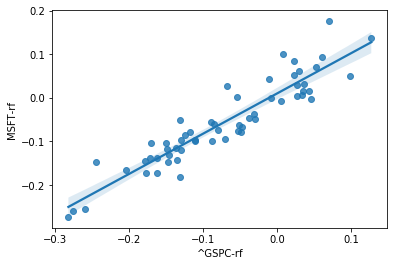

In [20]:
sns.regplot(x='^GSPC-rf',y='MSFT-rf',data=mlt_ret)#blue line is 95% confident interval
plt.show()